# Short-term Reversal

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

import activity as act
import available as avb
import utils as self_utils
from quantified_strategies import utils

C:\Users\tomw1\AppData\Local\Temp\ipykernel_23376\2940521800.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
TICKER = "^GSPC"

START = dt.date(2010, 1, 1)
END = dt.date.today()

In [3]:
self_utils.run(ticker=TICKER, start=START, end=END, full=True)

,Close,enter,exit,exit_shifted,return,down_from_yday,down_xdays_in_a_row,active,strat_ret,cum_strat_ret,cum_hodl_ret,enter_flag,trade_number
Date,,,,,,,,,,,,,
2010-01-04,1132.989990,1132.989990,1132.989990,1136.520020,0.003116,False,0.0,False,0.0,0.00000,0.003116,False,0
2010-01-05,1136.520020,1136.520020,1136.520020,1137.140015,0.000546,False,0.0,False,0.0,0.00000,0.003663,False,0
2010-01-06,1137.140015,1137.140015,1137.140015,1141.689941,0.004001,False,0.0,False,0.0,0.00000,0.007679,False,0
2010-01-07,1141.689941,1141.689941,1141.689941,1144.979980,0.002882,False,0.0,False,0.0,0.00000,0.010583,False,0
2010-01-08,1144.979980,1144.979980,1144.979980,1146.979980,0.001747,False,0.0,False,0.0,0.00000,0.012348,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-12,5021.839844,5021.839844,5021.839844,4953.169922,-0.013674,True,1.0,False,-0.0,0.66093,3.371768,False,176
2024-02-13,4953.169922,4953.169922,4953.169922,5000.620117,0.009580,True,2.0,False,0.0,0.66093,3.413649,False,176
2024-02-14,5000.620117,5000.620117,5000.620117,5029.729980,0.005821,False,2.0,False,0.0,0.66093,3.439342,False,176


## Rules

1. SPY must be down three days in a row (close to close).
2. Entry on the third down day at the close.
3. Exit on the open the next day

In [4]:
N_BEAR_DAYS = 3
ENTER_AT = "Close"
EXIT_AT = "Close"

START = dt.date(2010, 1, 1)
END = dt.date.today()

In [5]:
TICKER = "^GSPC"

In [6]:
data = yf.download(TICKER, progress=False).copy()
data = data.loc[(data.index.date >= START) & (data.index.date <= END)]
data.head(5)

C:\Users\tomw1\AppData\Local\pypoetry\Cache\virtualenvs\quantified-strategies-wFBlb7GR-py3.11\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [7]:
data = self_utils.convert(data=data)

In [8]:
data["active"] = act.get_activity(data=data)
data

,Close,enter,exit,exit_shifted,return,down_from_yday,down_xdays_in_a_row,active
Date,,,,,,,,
2010-01-04,1132.989990,1132.989990,1132.989990,1136.520020,0.003116,False,0.0,False
2010-01-05,1136.520020,1136.520020,1136.520020,1137.140015,0.000546,False,0.0,False
2010-01-06,1137.140015,1137.140015,1137.140015,1141.689941,0.004001,False,0.0,False
2010-01-07,1141.689941,1141.689941,1141.689941,1144.979980,0.002882,False,0.0,False
2010-01-08,1144.979980,1144.979980,1144.979980,1146.979980,0.001747,False,0.0,False
...,...,...,...,...,...,...,...,...
2024-02-12,5021.839844,5021.839844,5021.839844,4953.169922,-0.013674,True,1.0,False
2024-02-13,4953.169922,4953.169922,4953.169922,5000.620117,0.009580,True,2.0,False
2024-02-14,5000.620117,5000.620117,5000.620117,5029.729980,0.005821,False,2.0,False


In [9]:
data["strat_ret"] = data["active"] * data["return"]
data.head(5)

,Close,enter,exit,exit_shifted,return,down_from_yday,down_xdays_in_a_row,active,strat_ret
Date,,,,,,,,,
2010-01-04,1132.989990,1132.989990,1132.989990,1136.520020,0.003116,False,0.0,False,0.0
2010-01-05,1136.520020,1136.520020,1136.520020,1137.140015,0.000546,False,0.0,False,0.0
2010-01-06,1137.140015,1137.140015,1137.140015,1141.689941,0.004001,False,0.0,False,0.0
2010-01-07,1141.689941,1141.689941,1141.689941,1144.979980,0.002882,False,0.0,False,0.0
2010-01-08,1144.979980,1144.979980,1144.979980,1146.979980,0.001747,False,0.0,False,0.0


In [10]:
df_ret = data["return"].copy()
df_pos = data["active"].copy()
df_strat_ret = data["strat_ret"].copy()

## Plot Strategy Results

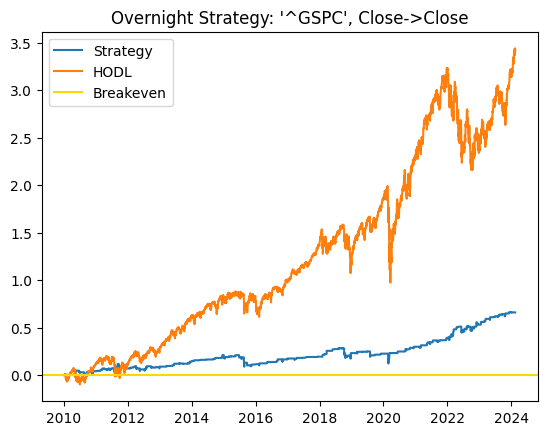

In [11]:
fig, ax = plt.subplots()
ax.plot(utils.get_cumulative_return(df_strat_ret, total=False), label="Strategy")
ax.plot(utils.get_cumulative_return(df_ret, total=False), label="HODL")
ax.axhline(y=0, label="Breakeven", color="gold")
ax.legend(loc="upper left")
plt.title(f"Overnight Strategy: {TICKER!r}, {ENTER_AT}->{EXIT_AT}")
plt.show()

## Describe Strategy

In [12]:
pd.concat([
    utils.describe(returns=df_strat_ret, pos=df_pos, daily=True, asset=TICKER),
    utils.describe(returns=df_ret, daily=True, asset=TICKER),
], axis=1)

,0,1
Asset,^GSPC,^GSPC
Start,2010-01-04,2010-01-04
End,2024-02-16,2024-02-16
Mean Return,0.17372%,0.04789%
Total Return,66.09%,341.80%
Median Return,0.15358%,0.06533%
1st Quartile,-0.44136%,-0.38697%
3rd Quartile,0.80484%,0.57005%
Std Dev Return,1.33447%,1.10041%
CAGR,16.487 bps,4.180 bps
